In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/gym_members_exercise_tracking.csv')

# Display basic information about the dataset
print("Dataset Info:")
data.info()

# Display the first few rows of the dataset
print("\nFirst Few Rows:")
data.head()

# Check for missing values
print("\nMissing Values Summary:")
print(data.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
data.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 n

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


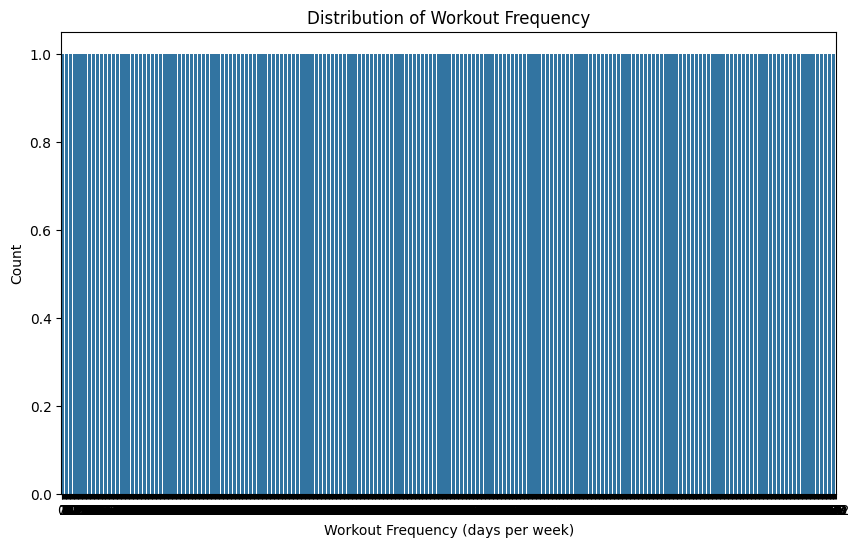

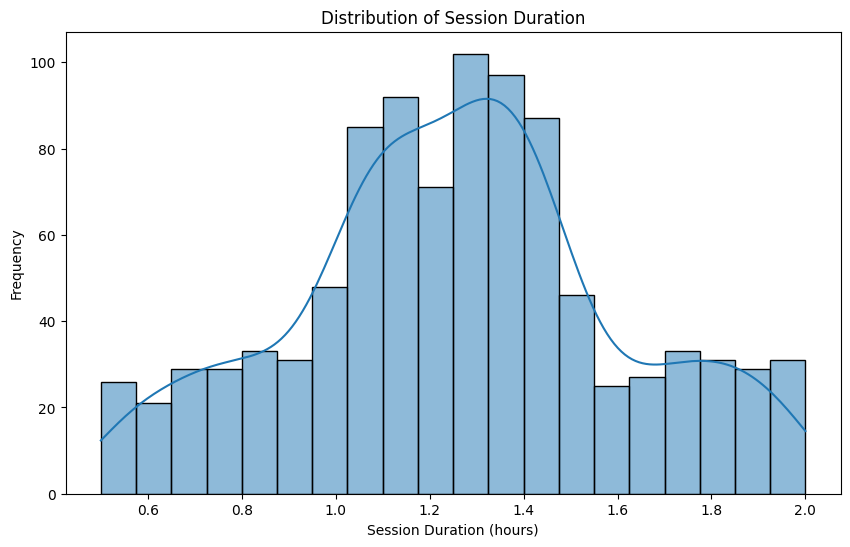

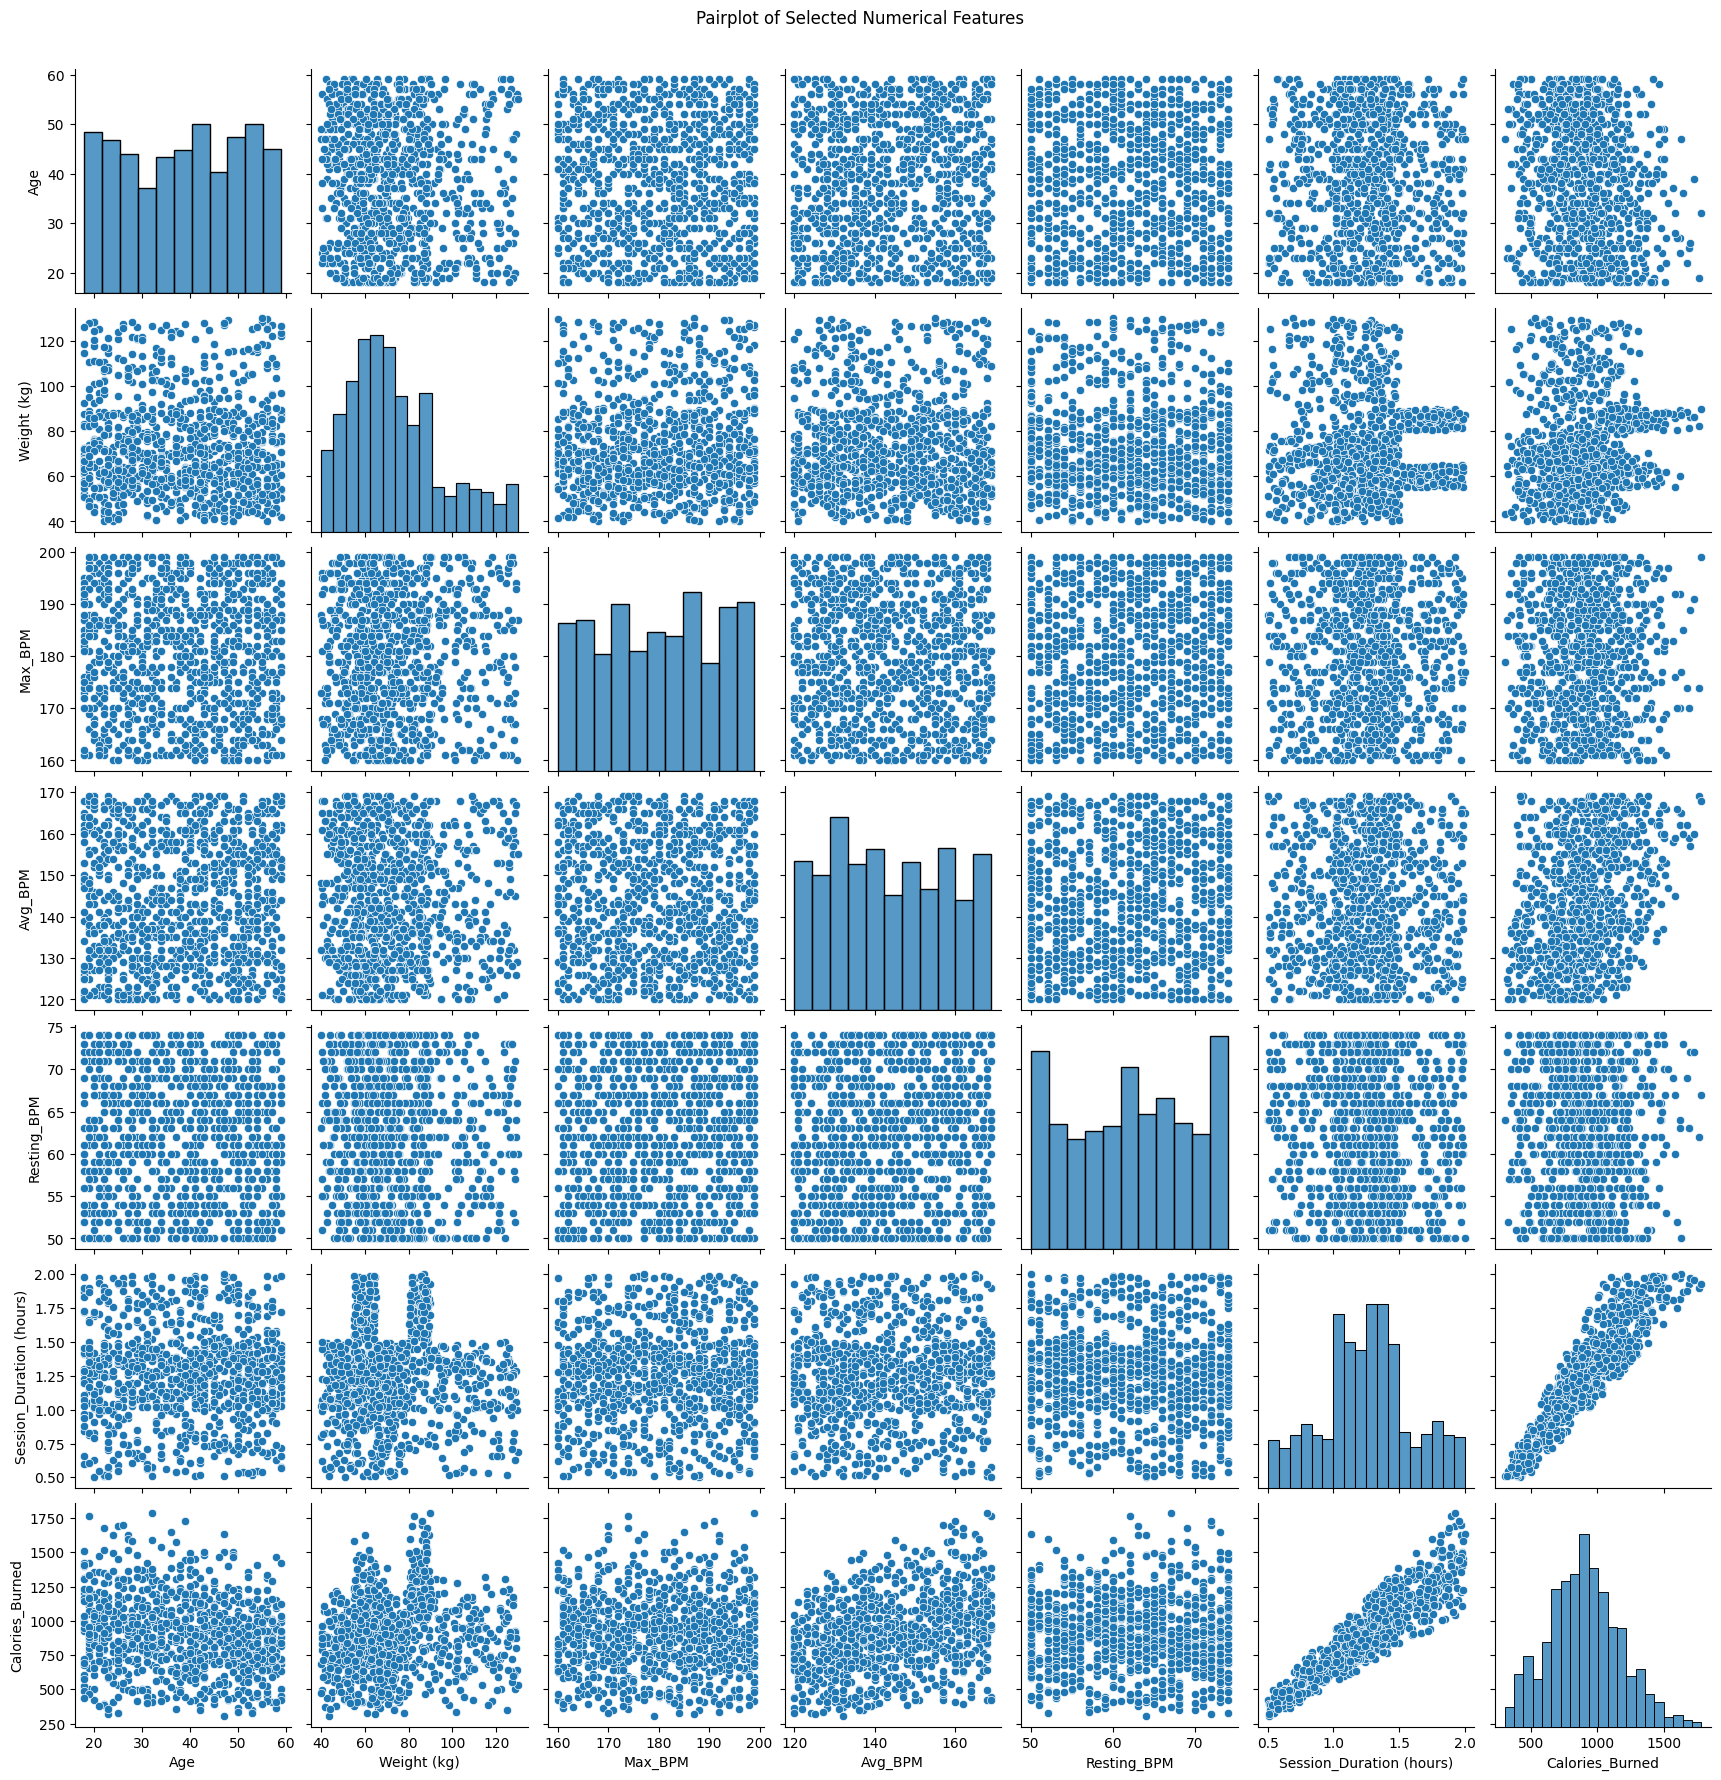

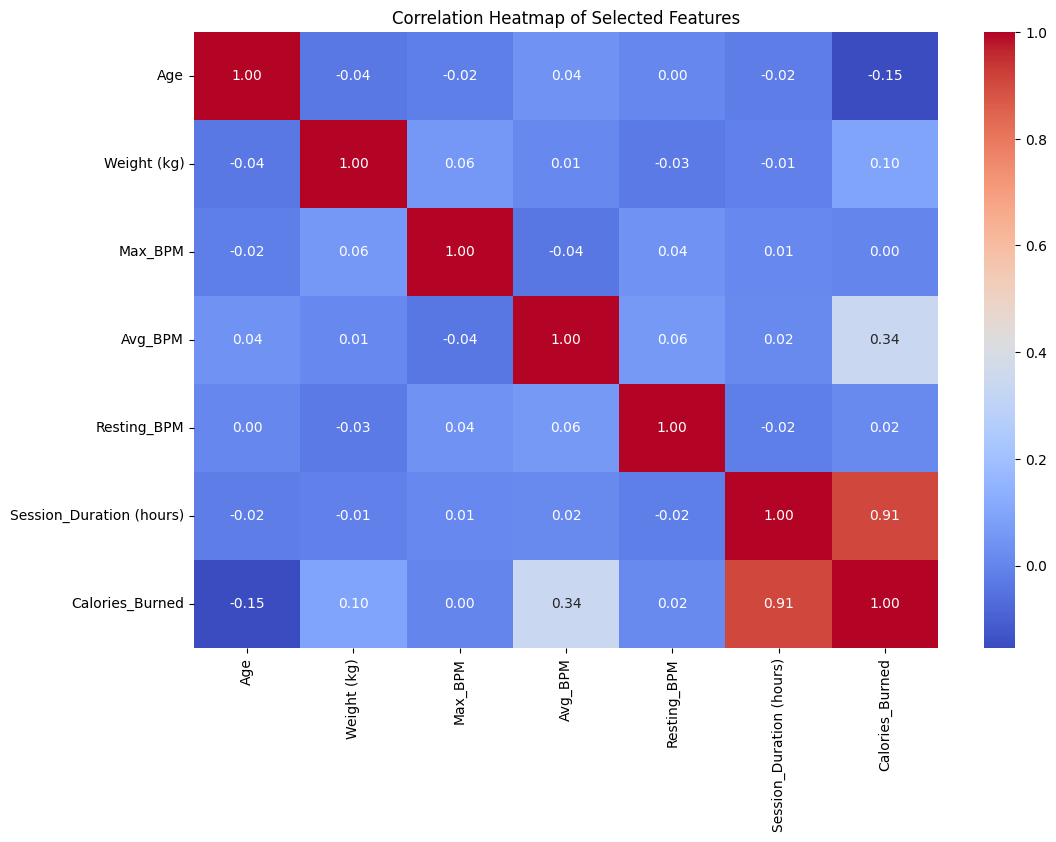

In [5]:
# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of workout frequency (days per week)
plt.figure(figsize=(10, 6))
sns.countplot(data['Workout_Frequency (days/week)'])
plt.title('Distribution of Workout Frequency')
plt.xlabel('Workout Frequency (days per week)')
plt.ylabel('Count')
plt.show()

# Distribution of session duration
plt.figure(figsize=(10, 6))
sns.histplot(data['Session_Duration (hours)'], bins=20, kde=True)
plt.title('Distribution of Session Duration')
plt.xlabel('Session Duration (hours)')
plt.ylabel('Frequency')
plt.show()

# Pairplot of selected numerical features to observe relationships
selected_features = ['Age', 'Weight (kg)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned']
sns.pairplot(data[selected_features])
plt.suptitle("Pairplot of Selected Numerical Features", y=1.02)
plt.show()

# Heatmap of correlations between numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(data[selected_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Selected Features")
plt.show()


In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Check for missing values
print("Missing Values Summary:")
print(data.isnull().sum())

# Handling Missing Values
# Dropping rows with missing values, but we could also consider filling with mean/median if needed
data = data.dropna()

# Encoding categorical variables
# Label Encoding Gender and Workout_Type if they are categorical
label_encoder = LabelEncoder()
if data['Gender'].dtype == 'object':
    data['Gender'] = label_encoder.fit_transform(data['Gender'])

if data['Workout_Type'].dtype == 'object':
    data['Workout_Type'] = label_encoder.fit_transform(data['Workout_Type'])

# Scaling numerical features
# Selecting columns to scale
numeric_features = ['Age', 'Weight (kg)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
                    'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
                    'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI']
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Display the first few rows of the prepared dataset
print("\nPrepared Data Sample:")
data.head()


Missing Values Summary:
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

Prepared Data Sample:


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,1.422343,1,0.681493,1.71,0.010081,0.922970,-0.303555,1.264598,1.495690,3,-1.978321,1.455967,0.743295,3,0.794278
1,0.600965,0,0.049316,1.53,-0.076726,0.504494,0.515749,0.127098,-0.082284,1,1.426301,-0.877898,0.743295,2,1.064652
2,-0.548964,0,-0.271491,1.66,-1.118414,-1.518142,-1.122858,-0.427068,-0.838243,0,1.346380,-0.544488,0.743295,2,-0.030361
3,-1.123928,1,-0.974433,1.70,0.878155,1.411193,-0.849757,-1.943735,-1.370351,2,0.611110,-0.877898,-0.352502,1,-0.976669
4,-0.056137,1,-1.309393,1.79,0.704540,0.992716,0.788850,-1.797902,-1.282278,2,0.675047,0.289035,-0.352502,1,-1.580503


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_linreg = linreg.predict(X_test)
print("Linear Regression - Mean Squared Error:", mean_squared_error(y_test, y_pred_linreg))
print("Linear Regression - Mean Absolute Error:", mean_absolute_error(y_test, y_pred_linreg))
print("Linear Regression - R^2 Score:", r2_score(y_test, y_pred_linreg))

# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf_reg = rf_reg.predict(X_test)
print("\nRandom Forest Regressor - Mean Squared Error:", mean_squared_error(y_test, y_pred_rf_reg))
print("Random Forest Regressor - Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf_reg))
print("Random Forest Regressor - R^2 Score:", r2_score(y_test, y_pred_rf_reg))

# Support Vector Regressor (SVR)
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
print("\nSupport Vector Regressor - Mean Squared Error:", mean_squared_error(y_test, y_pred_svr))
print("Support Vector Regressor - Mean Absolute Error:", mean_absolute_error(y_test, y_pred_svr))
print("Support Vector Regressor - R^2 Score:", r2_score(y_test, y_pred_svr))


Linear Regression - Mean Squared Error: 0.29866564104583065
Linear Regression - Mean Absolute Error: 0.54387164926172
Linear Regression - R^2 Score: 0.7088793600486559

Random Forest Regressor - Mean Squared Error: 0.3301085074849779
Random Forest Regressor - Mean Absolute Error: 0.5496248327534496
Random Forest Regressor - R^2 Score: 0.6782308148473533

Support Vector Regressor - Mean Squared Error: 0.37363866479824537
Support Vector Regressor - Mean Absolute Error: 0.5431944051249264
Support Vector Regressor - R^2 Score: 0.6358003323524603


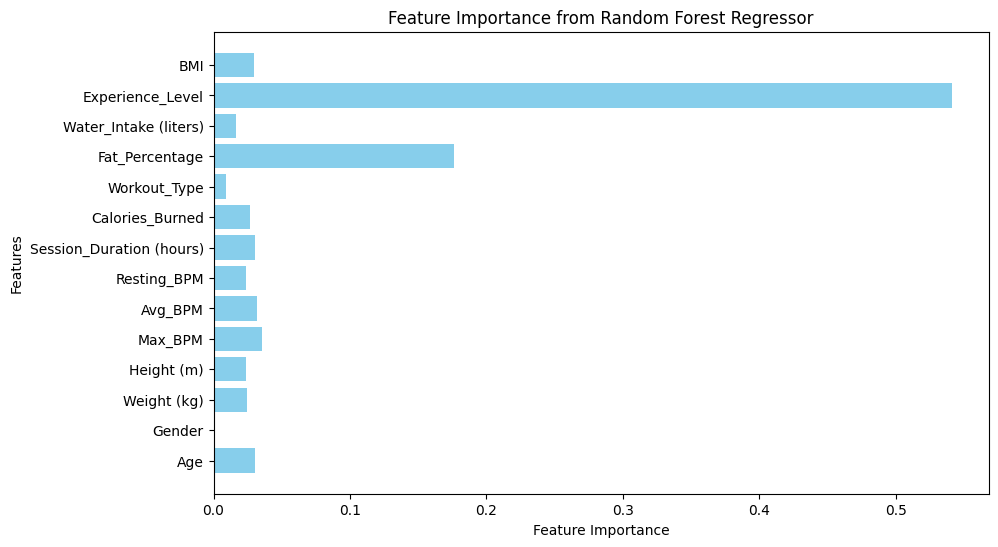

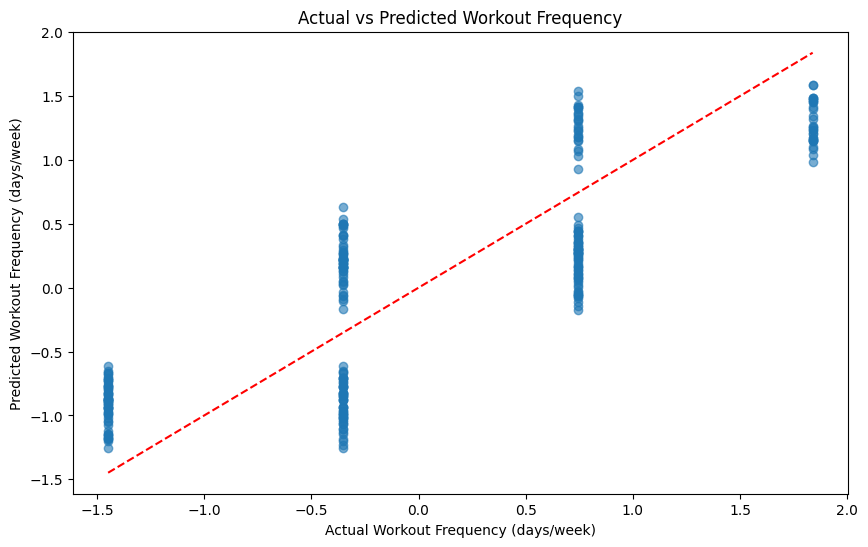

In [9]:
import numpy as np

# Check feature importance for Random Forest Regressor
feature_importance = rf_reg.feature_importances_
features = X.columns

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest Regressor")
plt.show()

# Plotting Actual vs Predicted values for the best model
y_pred_best = y_pred_rf_reg  # Replace with the predictions of the best-performing model

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line for perfect prediction
plt.xlabel("Actual Workout Frequency (days/week)")
plt.ylabel("Predicted Workout Frequency (days/week)")
plt.title("Actual vs Predicted Workout Frequency")
plt.show()


In [10]:
import joblib

# Save the best model - Random Forest Regressor
joblib.dump(rf_reg, 'final_random_forest_model.joblib')

# rf_reg_loaded = joblib.load('final_random_forest_model.joblib')


['final_random_forest_model.joblib']